### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from agent import Agent



is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
env = UnityEnvironment(file_name="C:/Users/user/deep-reinforcement-learning/p1_navigation/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Initiate brain for the envoronment

In [2]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

State size is 37, this is the code slightly modified from the previous exercise

In [22]:
from agent import Agent

n_episodes=2000 
max_t=1000 
eps_start=1.0 
eps_end=0.01 
eps_decay=0.995

agent = Agent(state_size=37, action_size=4, seed=2)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0] 
    score = 0
    for t in range(max_t):
        action = int(agent.act(state, eps))
        env_info = env.step(action)[brain_name]    
        
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]   
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break 
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break
    

Episode 100	Average Score: 0.57
Episode 200	Average Score: 3.02
Episode 300	Average Score: 6.80
Episode 400	Average Score: 10.58
Episode 500	Average Score: 13.26
Episode 600	Average Score: 13.98
Episode 700	Average Score: 14.21
Episode 800	Average Score: 14.53
Episode 900	Average Score: 15.92
Episode 1000	Average Score: 16.59
Episode 1100	Average Score: 15.42
Episode 1200	Average Score: 16.12
Episode 1300	Average Score: 14.99
Episode 1400	Average Score: 15.58
Episode 1500	Average Score: 15.56
Episode 1600	Average Score: 15.84
Episode 1700	Average Score: 15.90
Episode 1800	Average Score: 16.75
Episode 1900	Average Score: 15.92
Episode 2000	Average Score: 15.52


Save the trained agent and plot learning curve

In [24]:
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

In [29]:
import matplotlib.pyplot as plt
plt.ion()

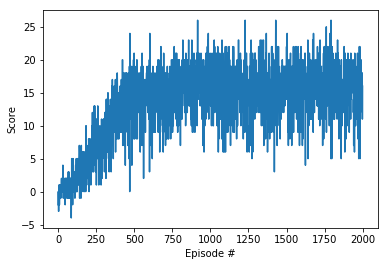

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Agent evaluation

Evaluate trained agent over 100 consecutive eposides, prove that average score is over 13

In [7]:
from agent import Agent
trained_agent = Agent(state_size=37, action_size=4, seed=0)
trained_agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

max_t = 1000
trained_scores = []
trained_scores_window = []
for i in range(101):
    
    env_info = env.reset()[brain_name]
    state = env_info.vector_observations[0] 
    score = 0
    for t in range(max_t):
        action = int(trained_agent.act(state))
        env_info = env.step(action)[brain_name]    
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]   
        state = next_state
        score += reward
        if done:
            break 
    trained_scores.append(score)  
    trained_scores_window.append(score)  
    #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, score), end="")
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(trained_scores_window)), end="")



Episode 100	Average Score: 14.81

Episode 100	Average Score: 14.81


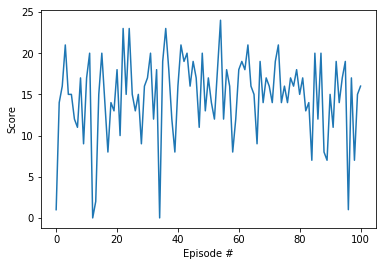

In [8]:
print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(trained_scores_window)))            
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trained_scores)), trained_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [11]:
env.close()

The average score is 14.81 which is above 13 and fullfills project requirements